# pandas.io.sql module   <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#sql-queries"> doc</a>

Here are the key functions:

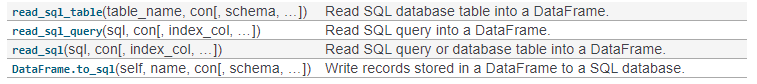

The function <b>real_sql()</b> is a convenience wrapper around <b>read_sql_table()</b> and <b>read_sql_query()</b>.

Also, check out this comparison between <a href="https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html">pandas vs sql</a>

In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("test_pandas.db")

### Define person & address tables

In [2]:
df_person = pd.DataFrame(
[[1, "Alan"],
 [2, "Billy"]],
columns=["id", "name"])

In [3]:
df_person

,id,name
0,1,Alan
1,2,Billy


In [4]:
df_address = pd.DataFrame(
[[1, 'San Fernando Street', '200', '95131', 1],
 [2, 'North First Street', '1210', '95112', 2]],
columns=["id", "street_name", "street_number", "zip_code", "person_id"])

In [5]:
df_address

,id,street_name,street_number,zip_code,person_id
0,1,San Fernando Street,200,95131,1
1,2,North First Street,1210,95112,2


### Write tables to database

In [6]:
df_person.to_sql("person", conn, if_exists="replace")

In [7]:
df_address.to_sql("address", conn, if_exists="replace")

### Check for the tables

In [8]:
df_tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

In [9]:
df_tables

,name
0,person
1,address


In [10]:
df_person2 = pd.read_sql("SELECT * FROM person", conn)

In [11]:
df_person2

,index,id,name
0,0,1,Alan
1,1,2,Billy


In [12]:
df_address2 = pd.read_sql("SELECT * FROM address", conn)

In [13]:
df_address2

,index,id,street_name,street_number,zip_code,person_id
0,0,1,San Fernando Street,200,95131,1
1,1,2,North First Street,1210,95112,2


### Drop the redundant index columns (not inplace)

In [14]:
df_person2 = df_person2.drop(columns=['index'])

In [15]:
df_person2

,id,name
0,1,Alan
1,2,Billy


In [16]:
df_address2 = df_address2.drop(columns=['index'])

In [17]:
df_address2

,id,street_name,street_number,zip_code,person_id
0,1,San Fernando Street,200,95131,1
1,2,North First Street,1210,95112,2


### Overwrite existing tables in database

In [18]:
df_person2.to_sql("person", conn, if_exists="replace", index=False)

In [19]:
df_address2.to_sql("address", conn, if_exists="replace", index=False)

### Close connection

In [20]:
conn.close()